# Finding Profitable App Profiles For The App Store And Google Play Markets

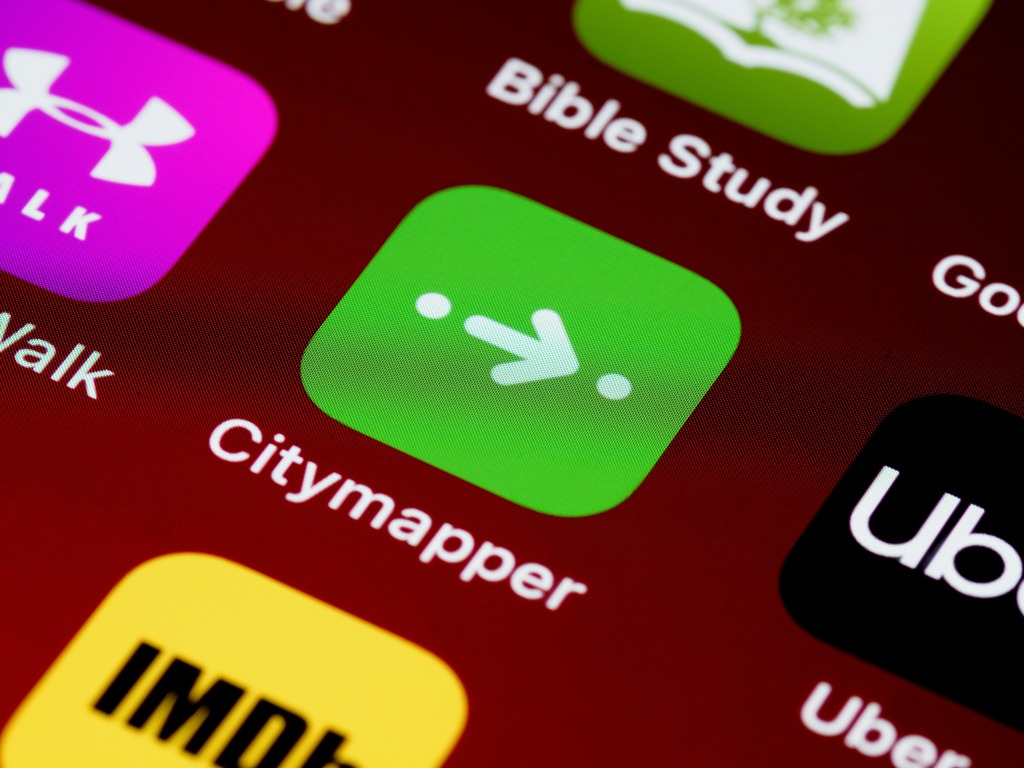

## Introduction
The aim of this project is to identify profitable Android (Google Play) and iOS (App Store) mobile apps.

The apps in consideration are free to download and install, and the main source of the company's revenue consists of in-app ads. This means the revenue for any given app is mostly influenced by the number of its users: the more users that see and engage with the ads, the better. Hence it's necessary to analyze available data to understand what type of apps are likely to attract more users both on Google Play and App Store.

*This project was completed by means of pure Python, without using any additional libraries except for csv.*

### Summary of Results
After a thorough analysis of the most common and most popular app genres of both datasets, we can suggest **SOCIAL NETWORKING** profile as the most prospective one for our purposes. As some possible themes, we discussed creating an online quiz, quest, some other online games with a lot of people/teams involved, or a social networking app dedicated to searching for co-travelers, itineraries, and places to visit.

## Data Collection and Exploration
As of [September 2018](https://www.statista.com/statistics/276623/number-of-apps-available-in-leading-app-stores/), there were approximately 2 million iOS apps available on App Store and 2.1 million Android apps on Google Play.

Collecting data for over 4 million apps requires a significant amount of time and money, so we'll try first to analyze a sample of the data instead, to see if we can find any relevant existing data at no cost. For this purpose, there are 2 datasets available in the form of CSV files:

- [Android app dataset](https://www.kaggle.com/lava18/google-play-store-apps) contains data about approximately 10,000 Android apps from Google Play; the data was collected in August 2018.
- [IOS app dataset](https://www.kaggle.com/ramamet4/app-store-apple-data-set-10k-apps) contains data about approximately 7,000 iOS apps from App Store; the data was collected in July 2017. 

In [1]:
from csv import reader

def explore_data(dataset):
    dataset_slice = dataset[0:3]
    for row in dataset_slice:
        print(row, '\n')
    if True:
        print(f'\033[1mNumber of rows:   \033[0m {len(dataset):,}\n'
              f'\033[1mNumber of columns:\033[0m {len(dataset[0])}')
        return ''
        
def csv_to_list(file):
    '''Opens a file, saves a header as a list and the rows as a list of lists.'''
    opened_file = open(file, encoding='utf8')
    read_file = reader(opened_file)
    rows = list(read_file)
    rows_header = rows[0]
    rows = rows[1:]
    return rows, rows_header

android, android_header = csv_to_list('googleplaystore.csv')
ios, ios_header = csv_to_list('AppleStore.csv')

print(f'\033[1mANDROID DATASET:\033[0m\n\n'
      f'\033[1mHeader:\n\033[0m {android_header}\n\n'
      f'\033[1mRows:\033[0m')
print(explore_data(android))
print(90*'_')
print(f'\033[1m\nIOS DATASET:\033[0m\n\n'
      f'\033[1mHeader:\n\033[0m {ios_header}\n\n'
      f'\033[1mRows:\033[0m')
print(explore_data(ios))

ANDROID DATASET:

Header:
 ['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']

Rows:
['Photo Editor & Candy Camera & Grid & ScrapBook', 'ART_AND_DESIGN', '4.1', '159', '19M', '10,000+', 'Free', '0', 'Everyone', 'Art & Design', 'January 7, 2018', '1.0.0', '4.0.3 and up'] 

['Coloring book moana', 'ART_AND_DESIGN', '3.9', '967', '14M', '500,000+', 'Free', '0', 'Everyone', 'Art & Design;Pretend Play', 'January 15, 2018', '2.0.0', '4.0.3 and up'] 

['U Launcher Lite – FREE Live Cool Themes, Hide Apps', 'ART_AND_DESIGN', '4.7', '87510', '8.7M', '5,000,000+', 'Free', '0', 'Everyone', 'Art & Design', 'August 1, 2018', '1.2.4', '4.0.3 and up'] 

Number of rows:    10,841
Number of columns: 13

__________________________________________________________________________________________

IOS DATASET:

Header:
 ['id', 'track_name', 'size_bytes', 'currency', 'price', 'rating_count_tot', 'rating_count

For our purposes, the most informative columns of the Google Play dataset (Android apps) seem to be the following: `App`, `Category`, `Rating`, `Reviews`, `Installs`, `Type`, `Price`, `Content Rating`, and `Genres`.

As for the App Store dataset (iOS apps), the columns potentially useful for our analysis might be the following: `track_name`, `currency`, `price`, `rating_count_tot`, `rating_count_ver`, `user_rating`, `user_rating_ver`, `cont_rating`, and `prime_genre`.

For further details about both datasets and the meaning of each column, we can always check the corresponding documentation: 
[Android](https://www.kaggle.com/lava18/google-play-store-apps) and [iOS](https://www.kaggle.com/ramamet4/app-store-apple-data-set-10k-apps).
## Data Cleaning
### Deleting Wrong Data
For both datasets, discussion sections are available here: [Google Play](https://www.kaggle.com/lava18/google-play-store-apps/discussion) and [App Store](https://www.kaggle.com/ramamet4/app-store-apple-data-set-10k-apps/discussion). In the discussion section dedicated to the **Google Play** dataset, in [one of the topics](https://www.kaggle.com/lava18/google-play-store-apps/discussion/66015), it was reported a wrong value for the row 10,472 (missing `Rating` and a shift for next columns):

In [2]:
print(f'{android_header}\n\n{android[10472]}')

['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']

['Life Made WI-Fi Touchscreen Photo Frame', '1.9', '19', '3.0M', '1,000+', 'Free', '0', 'Everyone', '', 'February 11, 2018', '1.0.19', '4.0 and up']


Inspecting the reported row, we can see that the missing value is actually not `Rating` but `Category`, and also there is no value for `Genres`. For comparison, let's check another row of this dataset:

In [3]:
print(f'{android_header}\n\n{android[5]}')

['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']

['Paper flowers instructions', 'ART_AND_DESIGN', '4.4', '167', '5.6M', '50,000+', 'Free', '0', 'Everyone', 'Art & Design', 'March 26, 2017', '1.0', '2.3 and up']


Hence the row 10,472 has a missing value for `Category`, an empty cell  for `Genres`, and all the values in between are shifted to the left. This row has to be removed from the dataset:

In [4]:
del android[10472]

### Deleting Duplicates
Exploring the **Google Play** dataset, we discovered that some apps have duplicate entries. For instance, Instagram has 4 entries:

In [5]:
for app in android:
    name = app[0]
    if  name == 'Instagram':
        print(f'{app}\n')

['Instagram', 'SOCIAL', '4.5', '66577313', 'Varies with device', '1,000,000,000+', 'Free', '0', 'Teen', 'Social', 'July 31, 2018', 'Varies with device', 'Varies with device']

['Instagram', 'SOCIAL', '4.5', '66577446', 'Varies with device', '1,000,000,000+', 'Free', '0', 'Teen', 'Social', 'July 31, 2018', 'Varies with device', 'Varies with device']

['Instagram', 'SOCIAL', '4.5', '66577313', 'Varies with device', '1,000,000,000+', 'Free', '0', 'Teen', 'Social', 'July 31, 2018', 'Varies with device', 'Varies with device']

['Instagram', 'SOCIAL', '4.5', '66509917', 'Varies with device', '1,000,000,000+', 'Free', '0', 'Teen', 'Social', 'July 31, 2018', 'Varies with device', 'Varies with device']



Let's check the total number of cases where an app occurs more than once:

In [6]:
duplicate_apps = []
unique_apps = []

for app in android:
    name = app[0]
    if name in unique_apps:
        duplicate_apps.append(name)
    else:
        unique_apps.append(name)

print(f'\033[1mNumber of duplicate apps:\033[0m {len(duplicate_apps):,}\n'
      f'\033[1mExamples of duplicate apps:\033[0m\n {duplicate_apps[:15]}')

Number of duplicate apps: 1,181
Examples of duplicate apps:
 ['Quick PDF Scanner + OCR FREE', 'Box', 'Google My Business', 'ZOOM Cloud Meetings', 'join.me - Simple Meetings', 'Box', 'Zenefits', 'Google Ads', 'Google My Business', 'Slack', 'FreshBooks Classic', 'Insightly CRM', 'QuickBooks Accounting: Invoicing & Expenses', 'HipChat - Chat Built for Teams', 'Xero Accounting Software']


We need to remove the duplicate entries and keep only one entry per app. Returning to the rows we printed for the Instagram app, the main difference happens on the 4th position of each row, which corresponds to the number of reviews. The different numbers show the data was collected at different times:

In [7]:
for app in android:
    name = app[0]
    if  name == 'Instagram':
        print(f'{app}\n')

['Instagram', 'SOCIAL', '4.5', '66577313', 'Varies with device', '1,000,000,000+', 'Free', '0', 'Teen', 'Social', 'July 31, 2018', 'Varies with device', 'Varies with device']

['Instagram', 'SOCIAL', '4.5', '66577446', 'Varies with device', '1,000,000,000+', 'Free', '0', 'Teen', 'Social', 'July 31, 2018', 'Varies with device', 'Varies with device']

['Instagram', 'SOCIAL', '4.5', '66577313', 'Varies with device', '1,000,000,000+', 'Free', '0', 'Teen', 'Social', 'July 31, 2018', 'Varies with device', 'Varies with device']

['Instagram', 'SOCIAL', '4.5', '66509917', 'Varies with device', '1,000,000,000+', 'Free', '0', 'Teen', 'Social', 'July 31, 2018', 'Varies with device', 'Varies with device']



We can use this information to build a criterion for removing the duplicates: the higher the number of reviews, the more recent the data should be. Rather than removing duplicates randomly, we'll only keep the row with the highest number of reviews and remove the other entries for any given app:

In [8]:
# Creating a dictionary with the highest number of reviews for each app
reviews_max = {}
for app in android:
    name = app[0]
    number_reviews = float(app[3])
    if (name in reviews_max and reviews_max[name] < number_reviews) or name not in reviews_max:
        reviews_max[name] = number_reviews

Given that we detected 1,181 duplicates in the Google Play dataset, now when we removed them, we should be left with 9,659 rows. Let's check it:

In [9]:
# Checking if the expected number of apps is equal to the actual one
len(android)-1181 == len(reviews_max)

True

Now, let's create a new dataset without duplicates:

In [10]:
android_clean = []
already_added = []
for app in android:
    name = app[0]
    number_reviews = float(app[3])
    if (number_reviews == reviews_max[name]) and (name not in already_added):
        android_clean.append(app)
        already_added.append(name)

Double-checking the length of the resulting dataset:

In [11]:
len(android_clean) == len(reviews_max)

True

### Deleting Non-English Apps
Since our company uses only English to develop its apps, we'd like to analyze only the apps that are directed towards an English-speaking audience.

Inspecting both datasets, we detected that both have also apps with non-English names, that is containing symbols unusual for English texts (i.e. not English letters, digits 0-9, punctuation marks, or special symbols). These apps have to be removed:

In [12]:
print(f'{ios[813][1]}\n{ios[6731][1]}\n{android_clean[7940][0]}')

爱奇艺PPS -《欢乐颂2》电视剧热播
【脱出ゲーム】絶対に最後までプレイしないで 〜謎解き＆ブロックパズル〜
لعبة تقدر تربح DZ


According to the ASCII system, the numbers corresponding to the set of common English characters are all in the range 0-127. Hence we have to create a function to identify if each symbol of each app name belongs or not to this range. If it doesn't, the app can't be considered for further data analysis and has to be removed from the dataset.

Let's create this function and test it on some apps:

In [13]:
def english_apps(string):
    '''Checks if each symbol of a string belongs or not to the ASCII range (0-127).'''
    for symbol in string:
        if ord(symbol) > 127:
            return False
    return True

print(f"{english_apps('Instagram')}\n"
      f"{english_apps('爱奇艺PPS -《欢乐颂2》电视剧热播')}\n"
      f"{english_apps('Docs To Go™ Free Office Suite')}\n"
      f"{english_apps('Instachat 😜')}\n")

True
False
False
False



It results that sometimes the function can't correctly identify certain English app names containing emoji and some special characters that fall outside the ASCII range. In such cases, we can lose valuable data. To minimize the impact of data loss, we'll only remove an app if its name has more than 3 characters with the corresponding numbers falling outside the ASCII range. This means all English apps with up to 3 such symbols will still be labeled as English:

In [14]:
# Editing the previous function
def english_apps(string):
    acceptable = 0
    for symbol in string:
        if ord(symbol) > 127:
            acceptable += 1
        if acceptable > 3:
            return False
    return True

# Checking the updated function
print(f"{english_apps('Instagram')}\n"
      f"{english_apps('爱奇艺PPS -《欢乐颂2》电视剧热播')}\n"
      f"{english_apps('Docs To Go™ Free Office Suite')}\n"
      f"{english_apps('Instachat 😜')}\n")

True
False
True
True



Now, we'll filter out non-English apps from both datasets:

In [15]:
android_cleaned_filtered = []
ios_filtered = []
for app in android_clean:
    check = english_apps(app[0])
    if check:
        android_cleaned_filtered.append(app)        
for app in ios:
    check = english_apps(app[1])
    if check:
        ios_filtered.append(app)

# Checking the results
print(f'\033[1mANDROID DATASET:\033[0m\n')
print(explore_data(android_cleaned_filtered))
print(90*'_')
print(f'\033[1m\nIOS DATASET:\033[0m\n')
print(explore_data(ios_filtered))

ANDROID DATASET:

['Photo Editor & Candy Camera & Grid & ScrapBook', 'ART_AND_DESIGN', '4.1', '159', '19M', '10,000+', 'Free', '0', 'Everyone', 'Art & Design', 'January 7, 2018', '1.0.0', '4.0.3 and up'] 

['U Launcher Lite – FREE Live Cool Themes, Hide Apps', 'ART_AND_DESIGN', '4.7', '87510', '8.7M', '5,000,000+', 'Free', '0', 'Everyone', 'Art & Design', 'August 1, 2018', '1.2.4', '4.0.3 and up'] 

['Sketch - Draw & Paint', 'ART_AND_DESIGN', '4.5', '215644', '25M', '50,000,000+', 'Free', '0', 'Teen', 'Art & Design', 'June 8, 2018', 'Varies with device', '4.2 and up'] 

Number of rows:    9,614
Number of columns: 13

__________________________________________________________________________________________

IOS DATASET:

['284882215', 'Facebook', '389879808', 'USD', '0.0', '2974676', '212', '3.5', '3.5', '95.0', '4+', 'Social Networking', '37', '1', '29', '1'] 

['389801252', 'Instagram', '113954816', 'USD', '0.0', '2161558', '1289', '4.5', '4.0', '10.23', '12+', 'Photo & Video', '37',

After filtering, the Android dataset counts 9,614 apps, the iOS one – 6,183 apps.
### Deleting Non-Free Apps
The company is specialized in building only free apps. Hence, before proceeding with the data analysis, we have to remove all non-free apps from both datasets:

In [16]:
android_final = []
ios_final = []
for app in android_cleaned_filtered:
    price = app[7]
    if price == '0':
        android_final.append(app)
for app in ios_filtered:
    price = app[4]
    if price == '0.0':
        ios_final.append(app)

# Checking the results
print(f'\033[1mANDROID DATASET:\033[0m\n')
print(explore_data(android_final))
print(90*'_')
print(f'\033[1m\nIOS DATASET:\033[0m\n')
print(explore_data(ios_final))

ANDROID DATASET:

['Photo Editor & Candy Camera & Grid & ScrapBook', 'ART_AND_DESIGN', '4.1', '159', '19M', '10,000+', 'Free', '0', 'Everyone', 'Art & Design', 'January 7, 2018', '1.0.0', '4.0.3 and up'] 

['U Launcher Lite – FREE Live Cool Themes, Hide Apps', 'ART_AND_DESIGN', '4.7', '87510', '8.7M', '5,000,000+', 'Free', '0', 'Everyone', 'Art & Design', 'August 1, 2018', '1.2.4', '4.0.3 and up'] 

['Sketch - Draw & Paint', 'ART_AND_DESIGN', '4.5', '215644', '25M', '50,000,000+', 'Free', '0', 'Teen', 'Art & Design', 'June 8, 2018', 'Varies with device', '4.2 and up'] 

Number of rows:    8,864
Number of columns: 13

__________________________________________________________________________________________

IOS DATASET:

['284882215', 'Facebook', '389879808', 'USD', '0.0', '2974676', '212', '3.5', '3.5', '95.0', '4+', 'Social Networking', '37', '1', '29', '1'] 

['389801252', 'Instagram', '113954816', 'USD', '0.0', '2161558', '1289', '4.5', '4.0', '10.23', '12+', 'Photo & Video', '37',

Now we have 8,864 Android and 3,222 iOS apps for further data analysis.
## Data Analysis
As we stated in the introduction, our aim is to determine the kinds of apps that are likely to attract more users because our revenue is highly influenced by the number of people using such apps.

To minimize risks, our validation strategy for an app idea is comprised of 3 steps:

- Build a minimal Android version of the app and add it to Google Play.
- If the app has a good response from users, we develop it further.
- If the app is profitable after 6 months, we build an iOS version of the app and add it to App Store.

Because our final goal is to add the app on both Google Play and App Store, we need to find app profiles that are successful in both markets.
### Finding The Most Common Genres
Let's begin our analysis by getting a sense of the most common genres for each market. For the **Google Play** dataset, the genres of the apps are described in the columns `Genres` and `Category`, for the **App Store** dataset – in the `prime_genre` column:

In [17]:
def freq_table(dataset, index):
    '''Generates a frequency table in % for a column of a dataset.'''
    dictionary = {}
    number_apps = 0
    for row in dataset:
        number_apps += 1
        dictionary[row[index]] = dictionary.get(row[index], 0) + 1
    dictionary_percent = {}
    for key in dictionary:
        dictionary_percent[key] = (dictionary[key] / number_apps) * 100
    return dictionary_percent

def display_table(dataset, index):
    '''Displays the % in a frequency table for a column of a dataset in descending order.''' 
    table = freq_table(dataset, index)
    table_display = []
    for key in table:
        key_val_as_tuple = (table[key], key)
        table_display.append(key_val_as_tuple)
    table_sorted = sorted(table_display, reverse=True)
    for entry in table_sorted:
        print(f'{entry[1]}: {entry[0]:.1f}')

# Checking App Store genres
display_table(dataset=ios_final, index=-5)

Games: 58.2
Entertainment: 7.9
Photo & Video: 5.0
Education: 3.7
Social Networking: 3.3
Shopping: 2.6
Utilities: 2.5
Sports: 2.1
Music: 2.0
Health & Fitness: 2.0
Productivity: 1.7
Lifestyle: 1.6
News: 1.3
Travel: 1.2
Finance: 1.1
Weather: 0.9
Food & Drink: 0.8
Reference: 0.6
Business: 0.5
Book: 0.4
Navigation: 0.2
Medical: 0.2
Catalogs: 0.1


Among **iOS English free apps**, the most common genre is *Games* (58%) followed with a big gap by *Entertainment* (7.9%). A general impression is that the apps designed for entertainment (games, photo and video, social networking, sports, music) strongly dominate App Store, in comparison to those ones designed for practical purposes (education, shopping, utilities, productivity, lifestyle). 

Judging only by the frequency table above, we still can't recommend an app profile for the App Store market because a large number of apps for a particular genre doesn't necessarily imply that apps of that genre have a large number of users.

In [18]:
# Checking Google Play categgories
display_table(dataset=android_final, index=1)

FAMILY: 18.9
GAME: 9.7
TOOLS: 8.5
BUSINESS: 4.6
LIFESTYLE: 3.9
PRODUCTIVITY: 3.9
FINANCE: 3.7
MEDICAL: 3.5
SPORTS: 3.4
PERSONALIZATION: 3.3
COMMUNICATION: 3.2
HEALTH_AND_FITNESS: 3.1
PHOTOGRAPHY: 2.9
NEWS_AND_MAGAZINES: 2.8
SOCIAL: 2.7
TRAVEL_AND_LOCAL: 2.3
SHOPPING: 2.2
BOOKS_AND_REFERENCE: 2.1
DATING: 1.9
VIDEO_PLAYERS: 1.8
MAPS_AND_NAVIGATION: 1.4
FOOD_AND_DRINK: 1.2
EDUCATION: 1.2
ENTERTAINMENT: 1.0
LIBRARIES_AND_DEMO: 0.9
AUTO_AND_VEHICLES: 0.9
HOUSE_AND_HOME: 0.8
WEATHER: 0.8
EVENTS: 0.7
PARENTING: 0.7
ART_AND_DESIGN: 0.6
COMICS: 0.6
BEAUTY: 0.6


Among **Android English free apps**, the most common categories are also of entertaining character: *FAMILY* (18.9%) and *GAME* (9.7%). However, the dispersion of percentages for the other categories is not as large as for iOS apps, and in general, a more balanced landscape of both practical and fun apps is observed. The number of categories is comparable with the number of iOS app genres. 

If we look at the `Genres` column for Android apps, we'll see that it's much more detailed and not anymore comparable with the number of iOS app genres:

In [19]:
# Checking Google Play genres
display_table(dataset=android_final, index=9)

Tools: 8.4
Entertainment: 6.1
Education: 5.3
Business: 4.6
Productivity: 3.9
Lifestyle: 3.9
Finance: 3.7
Medical: 3.5
Sports: 3.5
Personalization: 3.3
Communication: 3.2
Action: 3.1
Health & Fitness: 3.1
Photography: 2.9
News & Magazines: 2.8
Social: 2.7
Travel & Local: 2.3
Shopping: 2.2
Books & Reference: 2.1
Simulation: 2.0
Dating: 1.9
Arcade: 1.9
Video Players & Editors: 1.8
Casual: 1.8
Maps & Navigation: 1.4
Food & Drink: 1.2
Puzzle: 1.1
Racing: 1.0
Role Playing: 0.9
Libraries & Demo: 0.9
Auto & Vehicles: 0.9
Strategy: 0.9
House & Home: 0.8
Weather: 0.8
Events: 0.7
Adventure: 0.7
Comics: 0.6
Beauty: 0.6
Art & Design: 0.6
Parenting: 0.5
Card: 0.5
Casino: 0.4
Trivia: 0.4
Educational;Education: 0.4
Board: 0.4
Educational: 0.4
Education;Education: 0.3
Word: 0.3
Casual;Pretend Play: 0.2
Music: 0.2
Racing;Action & Adventure: 0.2
Puzzle;Brain Games: 0.2
Entertainment;Music & Video: 0.2
Casual;Brain Games: 0.1
Casual;Action & Adventure: 0.1
Arcade;Action & Adventure: 0.1
Action;Action & Ad

Like in the previous case, from these frequency tables alone, we can't deduce anything about the genres (categories) with the most users and can't recommend an app profile for Google Play.
### Finding The Most Popular Genres
One way to find out what genres are the most popular ones (have the most users) is to calculate the average number of installs for each app genre. For the **Google Play** dataset, we can find this information in the `Installs` column, but this information is missing for the **App Store** dataset. As a workaround, we'll take the total number of user ratings as a proxy, which we can find in the `rating_count_tot` column:

In [20]:
# Calculating the average number of user ratings per app genre on App Store
prime_genre = freq_table(dataset=ios_final, index=-5)
genre_dct = {}
for genre in prime_genre:
    total = 0
    len_genre = 0
    for app in ios_final:
        genre_app = app[-5]
        if genre_app == genre:
            number_rating = float(app[5])
            total += number_rating
            len_genre += 1
    average_number_rating = total/len_genre
    genre_dct[genre] = average_number_rating
genre_dct_sorted = dict(sorted(genre_dct.items(), key=lambda item: item[1], reverse=True))

for key in genre_dct_sorted:
    print(f'{key}: {genre_dct_sorted[key]:,.0f}')

Navigation: 86,090
Reference: 74,942
Social Networking: 71,548
Music: 57,327
Weather: 52,280
Book: 39,758
Food & Drink: 33,334
Finance: 31,468
Photo & Video: 28,442
Travel: 28,244
Shopping: 26,920
Health & Fitness: 23,298
Sports: 23,009
Games: 22,789
News: 21,248
Productivity: 21,028
Utilities: 18,684
Lifestyle: 16,486
Entertainment: 14,030
Business: 7,491
Education: 7,004
Catalogs: 4,004
Medical: 612


Looking at the results, a preliminary conclusion is that the most popular app genres (based on the average number of user ratings) are the following: 
- *Navigation*
- *Reference* 
- *Social Networking*
- *Music*
- *Weather*
- *Book*

Let's investigate in more detail each of them, in particular their contents of apps:

In [21]:
def exploring_ios_apps(column_name):
    print(f'\033[1m{column_name}:\033[0m')
    for app in ios_final:
        prime_genre = app[-5]
        app_name = app[1]
        number_ratings = int(app[5])
        if prime_genre == column_name:
            print(f'{app_name}: {number_ratings:,}')
    return ''

ios_genres = ['Navigation', 'Reference', 'Social Networking', 'Music', 'Weather', 'Book']
for genre in ios_genres:
    print(exploring_ios_apps(genre))

Navigation:
Waze - GPS Navigation, Maps & Real-time Traffic: 345,046
Google Maps - Navigation & Transit: 154,911
Geocaching®: 12,811
CoPilot GPS – Car Navigation & Offline Maps: 3,582
ImmobilienScout24: Real Estate Search in Germany: 187
Railway Route Search: 5

Reference:
Bible: 985,920
Dictionary.com Dictionary & Thesaurus: 200,047
Dictionary.com Dictionary & Thesaurus for iPad: 54,175
Google Translate: 26,786
Muslim Pro: Ramadan 2017 Prayer Times, Azan, Quran: 18,418
New Furniture Mods - Pocket Wiki & Game Tools for Minecraft PC Edition: 17,588
Merriam-Webster Dictionary: 16,849
Night Sky: 12,122
City Maps for Minecraft PE - The Best Maps for Minecraft Pocket Edition (MCPE): 8,535
LUCKY BLOCK MOD ™ for Minecraft PC Edition - The Best Pocket Wiki & Mods Installer Tools: 4,693
GUNS MODS for Minecraft PC Edition - Mods Tools: 1,497
Guides for Pokémon GO - Pokemon GO News and Cheats: 826
WWDC: 762
Horror Maps for Minecraft PE - Download The Scariest Maps for Minecraft Pocket Edition (MC

BookShout: Read eBooks & Track Your Reading Goals: 879
Dr. Seuss Treasury — 50 best kids books: 451
Green Riding Hood: 392
Weirdwood Manor: 197
MangaZERO - comic reader: 9
ikouhoushi: 0
MangaTiara - love comic reader: 0
謎解き: 0
謎解き2016: 0



- *Navigation* genre average number of ratings seems to be heavily influenced by 2 giant apps, Waze and Google Maps, while all the other apps show quite low numbers. It means that in this case, the average is not a good metric to use since the distribution is heavily skewed. If to exclude these 2 dominant apps, the average becomes very low, which makes this genre less interesting for our purposes.


- *Reference*. A similar situation is observed: average is influenced mostly by Bible and dictionaries, with a big gap with all the other apps of this genre.


- *Social Networking*. Even though also here we see obvious domination of Facebook and Pinterest, we can also notice that there are many other social networks for different categories of people and interests, with rather high values of the average number of ratings. We remember also that entertainment apps are very popular on App Store, and social networks, in particular, are not the most popular ones. Hence this market niche is probably not oversaturated, while the demand is still very high (since the need for communication always exists). Also, people usually spend a lot of time on this genre of apps. They use them for leisure, being relaxed and open to new information, so there is more chance for an in-app ad to attract their attention.


- *Music*. Like for the first 2 genres, the distribution for this one is skewed by several very popular apps. The rest of the apps mostly demonstrate rather low average number of ratings.


- *Weather*. This genre doesn't seem particularly interesting for our purposes, since people generally don't spend too much time in-app, and the chances of making a profit from in-app ads are low. Also, getting reliable live weather data may require connecting the app to non-free APIs. 


- *Book*. Here, practically, we have only 5 apps, if not to count few others, with extremely low average values. This niche is obviously undersaturated, which doesn't necessarily mean a low demand. Finding some granular directions in this sphere (e.g. personal growth, psychology, business) and developing high-quality content, we can attract probably not so large but pointedly interested audience, increasing in this way the chances of the app to become profitable.

Thus, the most promising iOS app profiles seem to be **Social Networking** and **Book**.

Our next step is to provide an app profile recommendation for the **Google Play** market. We have data about the number of installs, so we should be able to get a clearer picture about category popularity. However, the install numbers don't seem precise enough, with most values being open-ended (100+, 1,000+, 5,000+, etc.). We want to use these data anyway, after some cleaning: leaving the numbers as they are, removing commas and the plus characters, converting the numbers into `float` type:

In [22]:
# Calculating the average number of installs per app category on Google Play
categories = freq_table(dataset=android_final, index=1)
category_dct = {}
for category in categories:
    total = 0
    len_category = 0
    for app in android_final:
        category_app = app[1]
        if category_app == category:
            number_installs = app[5]
            number_installs = number_installs.replace('+', '').replace(',', '')
            total += float(number_installs)
            len_category += 1
    average_number_installs = total / len_category
    category_dct[category] = average_number_installs
category_dct_sorted = dict(sorted(category_dct.items(), key=lambda item: item[1], reverse=True))

for key in category_dct_sorted:
    print(f'{key}: {category_dct_sorted[key]:,.0f}')

COMMUNICATION: 38,456,119
VIDEO_PLAYERS: 24,727,872
SOCIAL: 23,253,652
PHOTOGRAPHY: 17,840,110
PRODUCTIVITY: 16,787,331
GAME: 15,588,016
TRAVEL_AND_LOCAL: 13,984,078
ENTERTAINMENT: 11,640,706
TOOLS: 10,801,391
NEWS_AND_MAGAZINES: 9,549,178
BOOKS_AND_REFERENCE: 8,767,812
SHOPPING: 7,036,877
PERSONALIZATION: 5,201,483
WEATHER: 5,074,486
HEALTH_AND_FITNESS: 4,188,822
MAPS_AND_NAVIGATION: 4,056,942
FAMILY: 3,695,642
SPORTS: 3,638,640
ART_AND_DESIGN: 1,986,335
FOOD_AND_DRINK: 1,924,898
EDUCATION: 1,833,495
BUSINESS: 1,712,290
LIFESTYLE: 1,437,816
FINANCE: 1,387,692
HOUSE_AND_HOME: 1,331,541
DATING: 854,029
COMICS: 817,657
AUTO_AND_VEHICLES: 647,318
LIBRARIES_AND_DEMO: 638,504
PARENTING: 542,604
BEAUTY: 513,152
EVENTS: 253,542
MEDICAL: 120,551


We see that the most popular app categories (based on the average number of installs) are the following:
- *COMMUNICATION*
- *VIDEO_PLAYERS*
- *SOCIAL*
- *PHOTOGRAPHY*
- *PRODUCTIVITY*
- *GAME*
- *TRAVEL_AND_LOCAL*

Let's investigate in more detail the contents of their apps. First, it seems that these seemingly popular genres are dominated by some giant apps, with the number of installs more than 100 million. These values, certainly, result in very biased average values. 

In [23]:
def exploring_android_giant_apps(category_name):
    print(f'\033[1m{category_name}:\033[0m')
    for app in android_final:
        app_name = app[0]
        category = app[1]
        if category == category_name:
            number_installs = app[5]
            number_installs = number_installs.replace('+', '').replace(',', '')
            if float(number_installs) >= 100000000:
                print(app_name, ':', app[5])
    return ''

# Exploring android giant apps for the 'COMMUNICATION' category
print(exploring_android_giant_apps('COMMUNICATION'))

COMMUNICATION:
WhatsApp Messenger : 1,000,000,000+
imo beta free calls and text : 100,000,000+
Android Messages : 100,000,000+
Google Duo - High Quality Video Calls : 500,000,000+
Messenger – Text and Video Chat for Free : 1,000,000,000+
imo free video calls and chat : 500,000,000+
Skype - free IM & video calls : 1,000,000,000+
Who : 100,000,000+
GO SMS Pro - Messenger, Free Themes, Emoji : 100,000,000+
LINE: Free Calls & Messages : 500,000,000+
Google Chrome: Fast & Secure : 1,000,000,000+
Firefox Browser fast & private : 100,000,000+
UC Browser - Fast Download Private & Secure : 500,000,000+
Gmail : 1,000,000,000+
Hangouts : 1,000,000,000+
Messenger Lite: Free Calls & Messages : 100,000,000+
Kik : 100,000,000+
KakaoTalk: Free Calls & Text : 100,000,000+
Opera Mini - fast web browser : 100,000,000+
Opera Browser: Fast and Secure : 100,000,000+
Telegram : 100,000,000+
Truecaller: Caller ID, SMS spam blocking & Dialer : 100,000,000+
UC Browser Mini -Tiny Fast Private & Secure : 100,000,

If to exclude from consideration these numerous giant apps of the *COMMUNICATION* category, the average would be reduced roughly 10 times:

In [24]:
def android_apps_without_giants(category_name):
    all_apps = []
    under_100_millions = []
    for app in android_final:
        category = app[1]
        number_installs = app[5]
        number_installs = number_installs.replace(',', '').replace('+', '')
        if category == category_name:
            all_apps.append(float(number_installs))
            if float(number_installs) < 100000000:
                under_100_millions.append(float(number_installs))
    average_number_installs_all = sum(all_apps) / len(all_apps)
    average_number_installs_without_giants = sum(under_100_millions) / len(under_100_millions)
    print(f'\033[1mAverage number of installs\033[0m\n'
          f'\033[1mWith giant apps:\033[0m    {average_number_installs_all:,.0f}\n'
          f'\033[1mWithout giant apps:\033[0m {average_number_installs_without_giants:,.0f}')
    return ''

# Recalculating the average number of installs for the 'COMMUNICATION' category
print('\033[1mCOMMUNICATION\033[0m')
print(android_apps_without_giants('COMMUNICATION'))

COMMUNICATION
Average number of installs
With giant apps:    38,456,119
Without giant apps: 3,603,485



The same tendency is traced for all the other categories that look the most popular ones:

In [25]:
android_categories = ['VIDEO_PLAYERS', 'SOCIAL', 'PHOTOGRAPHY', 'PRODUCTIVITY', 'GAME', 'TRAVEL_AND_LOCAL']
for category in android_categories:
    print(f'{exploring_android_giant_apps(category)}')
    print(f'{android_apps_without_giants(category)}')
    print('__________________________________________________________________________________________\n')

VIDEO_PLAYERS:
YouTube : 1,000,000,000+
Motorola Gallery : 100,000,000+
VLC for Android : 100,000,000+
Google Play Movies & TV : 1,000,000,000+
MX Player : 500,000,000+
Dubsmash : 100,000,000+
VivaVideo - Video Editor & Photo Movie : 100,000,000+
VideoShow-Video Editor, Video Maker, Beauty Camera : 100,000,000+
Motorola FM Radio : 100,000,000+

Average number of installs
With giant apps:    24,727,872
Without giant apps: 5,544,878

__________________________________________________________________________________________

SOCIAL:
Facebook : 1,000,000,000+
Facebook Lite : 500,000,000+
Tumblr : 100,000,000+
Pinterest : 100,000,000+
Google+ : 1,000,000,000+
Badoo - Free Chat & Dating App : 100,000,000+
Tango - Live Video Broadcast : 100,000,000+
Instagram : 1,000,000,000+
Snapchat : 500,000,000+
LinkedIn : 100,000,000+
Tik Tok - including musical.ly : 100,000,000+
BIGO LIVE - Live Stream : 100,000,000+
VK : 100,000,000+

Average number of installs
With giant apps:    23,253,652
Without gi

We can reveal some insights about each of the most popular categories:
- *COMMUNICATION* is oversaturated by numerous giant apps, with a big gap with all the others. This implies huge competition in this sphere, with very limited chances for newcomers. Apart from that, this category doesn't appear in a clear way among the genres of the App Store, and our aim is to recommend an app profile that shows potential for being profitable on both App Store and Google Play.


- *VIDEO_PLAYERS*, again, is oversaturated by some giant apps (even though fewer than the *COMMUNICATION* category), with a big gap with all the others. Also, this category doesn't appear clearly among the genres of the App Store, only as a part of the *Photo & Video* genre, so it's impossible to compare these two genres in a direct way. In addition, the *Photo & Video* genre was not one of the most popular on the App Store.


- *SOCIAL*. This category is also dominated by few famous apps like Facebook and Pinterest. However, some of these apps are quite specialized (LinkedIn used for work, Badoo for dating, etc), so their functions are different and the apps are not substitutable. Coming up with an interesting thematic social network could be a good idea for our apps, also because the average of the installs is still quite high even after excluding the giant apps. On App Store, we also found the corresponding genre *Social Networking* being highly potential. Hence this sphere can become profitable in both markets, which indeed is our ultimate goal.


- *PHOTOGRAPHY* category shows a high average number of installs even after removing the giant apps. Despite this, and despite being one of the most common genres on both markets, it isn't identified as one of the most popular genres on the App Store. In addition, this category is represented mostly by photo editors, presumably used mainly for work by professional photographers. This work requires high concentration, so in-app ads probably will not a meet suitable target audience here.


- *PRODUCTIVITY* genre is heavily dominated by famous apps. Also, it doesn't result to be very popular on App Store, even being among the most common ones.


- *GAME*. This category is the most common on App Store and the second common on Google Play. On Google Play, it shows also a high number of installs after removing numerous giant apps. However, on App Store, it isn't particularly popular. Anyway, given the certain potential of this genre, we can consider the idea of creating a game-based social network (since we have already defined this category as possibly profitable). It can be, for instance, an online quiz, quest, some other online games where the involvement of several teams (or several participants) currently available online is required. In this case, for being effective in capturing attention, the in-app ads should appear between games while people are waiting for the results and can percept new information without being distracted from the game. 


- *TRAVEL_AND_LOCAL* category has very few (but strongly influencing the average number of installs) dominant apps, which are mostly about maps and hotels. According to our investigation of the most common genres, this category is in the middle in both datasets. Among the iOS apps, it isn't particularly popular, so it doesn't fit our purposes. However, we can use this idea for our apps: creating a social network related to traveling. For example, it can be an app dedicated to searching for co-travelers or a company to travel together, discussing itineraries, what to visit in a certain place, etc.

When we were investigating the app genres of the App Store, we defined as potential also the *Book* profile. For Google Play, the corresponding category (*BOOKS_AND_REFERENCE*) doesn't appear one of the most popular and, practically, is at the 11th place among the 33 categories. It could be also difficult to extract from here some ideas for a social networking app. Hence to create apps profitable on both markets, books don't seem to be the best choice.
## Conclusion
After a thorough analysis of the most common and most popular app genres of both datasets, we can suggest **SOCIAL NETWORKING** profile as the most prospective for our purposes, i.e. creating profitable free English apps with the revenue based on in-app ads for both App Store and Google Play. To stand out in the existing apps of this kind and to overcome the competition, the right theme has to be selected. As some possible ideas, we discussed creating an online quiz, quest, some other online games with a lot of people/teams involved, or a social networking app dedicated to searching for co-travelers, itineraries, and places to visit.